In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
custom_ngram_df = pd.read_pickle('../Data/00_clean_custom_ngram')

In [3]:
custom_ngram_df.head()

,company_name,job_title,listed_items,url
0,New York Stem Cell Foundation,"PhD Scientist, Neurodegenerative Disease Brain...",develop analyze 2d 3d cellular model neurodege...,https://www.indeed.com/rc/clk?jk=60fa6b914b658...
2,Blue Mesa Health,Front-End Angular Developer,write develop analyze elevate well structured ...,https://www.indeed.com/rc/clk?jk=9aa1678a96dd6...
3,Mayor's Office of Contract Services,"Analyst, Learning Management [JO 380385 & 378151]",provide high quality support user city procure...,https://www.indeed.com/company/Mayor's-Office-...
5,ADP,Senior Strategy Analyst,structure solution complex business problem pr...,https://www.indeed.com/rc/clk?jk=bb01d61a65e12...
7,Avanade,Azure Data Engineer,translate business requirement technical solut...,https://www.indeed.com/rc/clk?jk=e6b5fa9fc5b0e...


### TF-IDF - KMeans

In [4]:
tf_idf = TfidfVectorizer(max_df=0.95)
tf_idf_array = tf_idf.fit_transform(custom_ngram_df.listed_items).toarray()
tf_idf_df = pd.DataFrame(tf_idf_array,columns=tf_idf.get_feature_names())
tf_idf_df.shape

(11643, 32392)

In [8]:
tf_idf_df.values.transpose()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
tf_idf_df.head()

(11643, 10000)

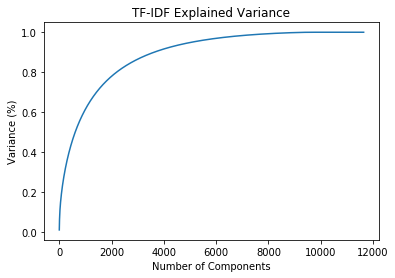

In [19]:
#Fitting the PCA algorithm with our Data
pca = PCA(n_components=32392).fit(tf_idf_df)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_,axis=0))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('TF-IDF Explained Variance')
plt.show()

In [38]:
pca = PCA(n_components=6000)
pca.fit(tf_idf_df)
tf_idf_df = pd.DataFrame(pca.transform(tf_idf_df))

In [39]:
tf_idf_df.head()

,0,1,2
0,-0.031580,-0.134692,-0.093110
1,0.081025,-0.000810,0.096958
2,-0.090115,-0.050961,0.040008
3,-0.124289,0.167946,-0.132819
4,0.110579,0.081964,0.063888


In [40]:
tf_idf_df.to_pickle('../Data/00_pca_tfidf')

In [41]:
inertia = []
i = 2
while i <= 26:
    num_clusters = i
    km = KMeans(n_clusters=num_clusters,n_jobs=-1,verbose=1,n_init=5)
    km.fit(tf_idf_df.values)
    inertia.append(km.inertia_)
    i += 1

Initialization complete
Initialization complete
Initialization complete
start iteration
Initialization complete
start iteration
done sorting
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Initialization complete
done sorting
end inner loop
Iteration 0, inertia 247.23966910079295
end inner loop
start iteration
Iteration 0, inertia 278.27234712127245
Iteration 0, inertia 263.5725057558684
start iteration
start iteration
done sorting
Iteration 0, inertia 265.02392940627254
done sorting
start iteration
done sorting
start iteration
end inner loop
end inner loop
done sorting
done sorting
end inner loop
Iteration 0, inertia 258.241039783445
Iteration 1, inertia 245.44120493501464
end inner loop
start iteration
Iteration 1, inertia 258.42422253650693
start iteration
end inner loop
Iteration 1, inertia 258.1901727533792
done sorting
start iteration
done sorting
end inner loop
start iteration
Iteration 1, inertia 252.8029294350588
done sorting
done sortin

In [35]:
len(inertia)

25

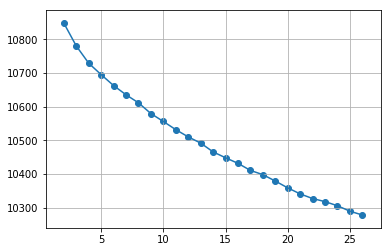

In [44]:
inertia = [10847.961304666424,
 10780.113982246414,
 10728.901717949193,
 10694.950030680197,
 10662.500551448547,
 10635.187396941204,
 10611.265711196496,
 10579.336385025295,
 10555.88124060252,
 10531.569328000158,
 10510.10385634849,
 10491.649035210667,
 10465.515100370036,
 10448.043718844678,
 10431.439004332346,
 10410.491902370697,
 10397.861788600845,
 10378.917929647845,
 10358.640736972386,
 10340.698856333323,
 10326.90778131084,
 10317.736460308955,
 10305.462312657408,
 10289.295573264453,
 10277.987467345612]


plt.grid()
plt.plot(range(2,27,1),inertia)
plt.scatter(range(2,27,1),inertia)

### Word2vec

In [ ]:
word2vec_df = pd.read_pickle('../Data/00_all_data_word2vec')

In [ ]:
inertia = []
i = 2
while i <= 25:
    num_clusters = i
    km = KMeans(n_clusters=num_clusters,n_jobs=-1,verbose=1,n_init=5)
    km.fit(word2vec_df.values)
    inertia.append(km.inertia_)
    i += 1

In [ ]:
inertia

In [ ]:
plt.grid()
plt.plot(range(2,26,1),inertia)
plt.scatter(range(2,26,1),inertia)